# Read OpendTect horizons

The best way to export horizons from OpendTect is with these options:

- x/y and inline/crossline
- with header (single or multi-line, it doesn't matter)
- choose all the attributes you want

On the last point, if you choose multiple horizons in one file, you can only have one attribute in the file. 

## IL/XL only, single-line header, multiple attributes

In [2]:
import gio

ds = gio.read_odt('data/OdT/3d_horizon/Segment_ILXL_Single-line-header.dat')
ds

<xarray.Dataset>
Dimensions:         (iline: 54, xline: 57)
Coordinates:
  * iline           (iline) int64 376 378 380 382 384 ... 474 476 478 480 482
  * xline           (xline) int64 812 814 816 818 820 ... 916 918 920 922 924
Data variables:
    twt             (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    amplitude       (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    correlation     (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    seed_index      (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    tracking_order  (iline, xline) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    odt_filename:  ../../data/OdT/3d_horizon/Segment_ILXL_Single-line-header.dat

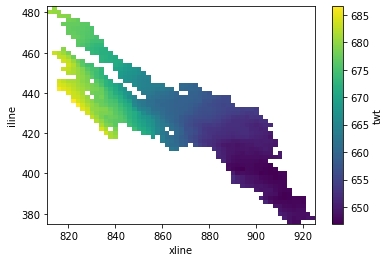

In [ ]:
ds['twt'].plot()

## IL/XL and XY, multi-line header, multiple attributes

### Load everything (default)

X and Y are loaded as `cdp_x` and `cdp_y`, to be consistent with [the **`seisnc`** standard](https://segysak.readthedocs.io/en/latest/seisnc-standard.html) in [`segysak`](https://segysak.readthedocs.io/en/latest/index.html).

In [3]:
ds = gio.read_odt('../data/OdT/3d_horizon/Segment_XY-and-ILXL_Multi-line-header.dat')
ds

<xarray.Dataset>
Dimensions:         (iline: 54, xline: 57)
Coordinates:
  * iline           (iline) int64 376 378 380 382 384 ... 474 476 478 480 482
  * xline           (xline) int64 812 814 816 818 820 ... 916 918 920 922 924
    cdp_x           (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    cdp_y           (iline, xline) float64 nan nan nan nan ... nan nan nan nan
Data variables:
    twt             (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    amplitude       (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    correlation     (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    seed_index      (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    tracking_order  (iline, xline) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    odt_filename:  ../data/OdT/3d_horizon/Segment_XY-and-ILXL_Multi-line-head...

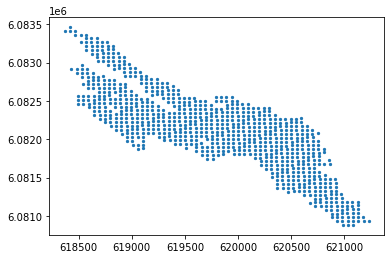

In [4]:
import matplotlib.pyplot as plt

plt.scatter(ds.coords['cdp_x'], ds.coords['cdp_y'], s=5)

### Load only inline, crossline, TWT

There is only one attribute here: Z, which is the two-way time of the horizon.

**Note that when loading data from OpendTect, you always get an `xarray.Dataset`, even if there's only a single attribute. This is because the format supports multiple grids and we didn't want you to have to guess what a given file would produce.**

In [5]:
fname = '../data/OdT/3d_horizon/Segment_XY-and-ILXL_Multi-line-header.dat'
names = ['Inline', 'Crossline', 'Z']  # Must match OdT DAT file.

ds = gio.read_odt(fname, names=names)
ds

<xarray.Dataset>
Dimensions:  (iline: 54, xline: 57)
Coordinates:
  * iline    (iline) int64 376 378 380 382 384 386 ... 472 474 476 478 480 482
  * xline    (xline) int64 812 814 816 818 820 822 ... 914 916 918 920 922 924
Data variables:
    twt      (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    odt_filename:  ../data/OdT/3d_horizon/Segment_XY-and-ILXL_Multi-line-head...

## XY only

If you have a file with no IL/XL, `gio` can try to load data using only X and Y:

- If there's a header you can load any number of attributes.
- If there's no header, you can only one attribute (e.g. TWT) automagically...
- OR, if there's no header, you can provide `names` to tell `gio` what everything is.

`gio` must create fake inline and crossline numbers; you can provide an origin and a step size. For example, notice above that the true inline and crossline numbers are:

- inline: 376, 378, 380, etc.
- crossline: 812, 814, 816, etc.

So we can pass an origin of `(376, 812)` and a step of `(2, 2)` to mimic these.

### Header present

In [6]:
fname = '../data/OdT/3d_horizon/Segment_XY_Single-line-header.dat'

ds = gio.read_odt(fname, origin=(376, 812), step=(2, 2))
ds

/home/matt/miniconda3/envs/gio/lib/python3.9/site-packages/gio/opendtect.py:239: UserWarning: Attempting to construct grid from (x, y) locations.
  dx = df_to_xarray(df, attrs=attrs, origin=origin, step=step)


<xarray.Dataset>
Dimensions:         (iline: 54, xline: 57)
Coordinates:
  * iline           (iline) int64 376 378 380 382 384 ... 474 476 478 480 482
  * xline           (xline) int64 812 814 816 818 820 ... 916 918 920 922 924
    cdp_x           (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    cdp_y           (iline, xline) float64 nan nan nan nan ... nan nan nan nan
Data variables:
    twt             (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    amplitude       (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    correlation     (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    seed_index      (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    tracking_order  (iline, xline) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    odt_filename:  ../data/OdT/3d_horizon/Segment_XY_Single-line-header.dat

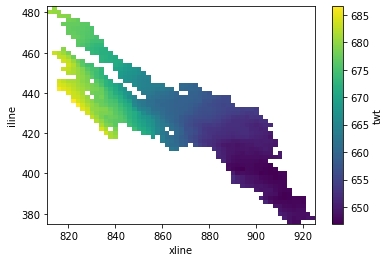

In [7]:
ds['twt'].plot()

### No header, more than one attribute: raises an error

In [8]:
fname = '../data/OdT/3d_horizon/Segment_XY_No-header.dat'

ds = gio.read_odt(fname)
ds

# Raises an error:

TypeError: First two columns must be integers to be interpreted as inline and crossline.

In [9]:
fname = '../data/OdT/3d_horizon/Segment_XY_No-header.dat'

ds = gio.read_odt(fname, names=['X', 'Y', 'TWT'])
ds

<xarray.Dataset>
Dimensions:  (iline: 54, xline: 57)
Coordinates:
  * iline    (iline) int64 0 1 2 3 4 5 6 7 8 9 ... 44 45 46 47 48 49 50 51 52 53
  * xline    (xline) int64 0 1 2 3 4 5 6 7 8 9 ... 47 48 49 50 51 52 53 54 55 56
    cdp_x    (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
    cdp_y    (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    twt      (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    odt_filename:  ../data/OdT/3d_horizon/Segment_XY_No-header.dat

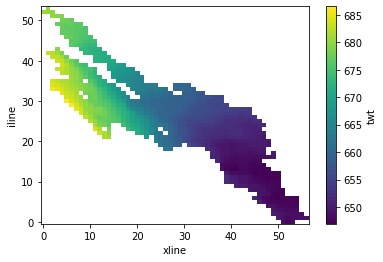

In [10]:
ds['twt'].plot()

## Sparse data

Sometimes a surface only exists at a few points, e.g. a 3D seismic interpretation grid. In general, loading data like this is completely safe if you have inline and xline locations. If you only have (x, y) locations, `gio` will attempt to load it, but you should inspect the result carefullly.

In [20]:
fname = '../data/OdT/3d_horizon/Nimitz_Salmon_XY-and-ILXL_Single-line-header.dat'

ds = gio.read_odt(fname)
ds

<xarray.Dataset>
Dimensions:    (iline: 62, xline: 185)
Coordinates:
  * iline      (iline) int64 1190 1197 1198 1199 1200 ... 1254 1255 1256 1257
  * xline      (xline) int64 1941 1942 1943 1944 1945 ... 2122 2123 2124 2125
    cdp_x      (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan
    cdp_y      (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan
Data variables:
    twt        (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan
    amplitude  (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    odt_filename:  ../data/OdT/3d_horizon/Nimitz_Salmon_XY-and-ILXL_Single-li...

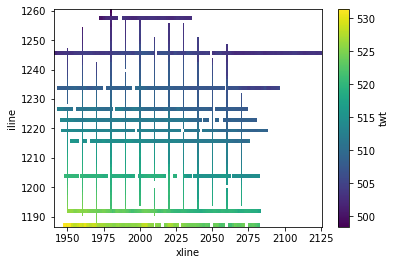

In [21]:
ds['twt'].plot.imshow()

There's some sort of artifact with the default plot style, which uses `pcolormesh` I think.

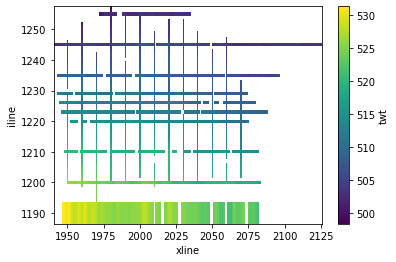

In [22]:
ds['twt'].plot()

## Multiple horizons in one file

You can export multiple horizons from OpendTect. These will be loaded as one `xarray.Dataset` as different **Data variables**. (The actual attribute you exported from OdT is always called Z; this information is not retained in the xarray.)

In [14]:
fname = '../../gio-dev/data/OdT/3d_horizon/multi_horizon/Multi_header_H2_and_H4_X_Y_iL_xL_Z_in_sec.dat'

ds = gio.read_odt(fname)
ds

<xarray.Dataset>
Dimensions:               (xline: 232, iline: 225)
Coordinates:
  * xline                 (xline) int64 686 688 690 692 ... 1142 1144 1146 1148
  * iline                 (iline) int64 110 112 114 116 118 ... 552 554 556 558
    cdp_x                 (iline, xline) float64 nan nan ... 6.267e+05 6.267e+05
    cdp_y                 (iline, xline) float64 nan nan ... 6.086e+06 6.086e+06
Data variables:
    F3_Demo_2_FS6         (iline, xline) float64 nan nan nan ... 0.6645 0.6623
    F3_Demo_4_Truncation  (iline, xline) float64 0.9625 0.9618 ... 0.6148 0.614

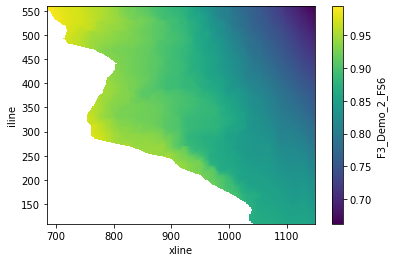

In [15]:
ds['F3_Demo_2_FS6'].plot()

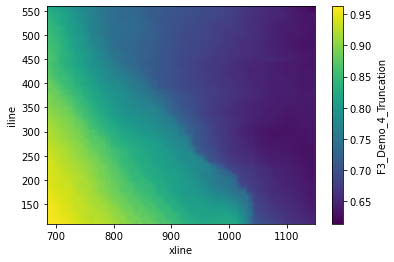

In [16]:
ds['F3_Demo_4_Truncation'].plot()

### Multi-horizon, no header

Unfortunately, OdT exports (x, y) in the first two columns, meaning you can't assume that columns 3 and 4 are inline, crossline. So if there's no header, and XY as well as inline/xline, you have to give the column names:

In [17]:
import gio

fname = '../data/OdT/3d_horizon/Test_Multi_XY-and-ILXL_Z-only.dat'

ds = gio.read_odt(fname, names=['Horizon', 'X', 'Y', 'Inline', 'Crossline', 'Z'])
ds

<xarray.Dataset>
Dimensions:      (iline: 1, xline: 10)
Coordinates:
  * iline        (iline) int64 990
  * xline        (xline) int64 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024
    cdp_x        (iline, xline) float64 1.703e+06 1.703e+06 ... 1.703e+06
    cdp_y        (iline, xline) float64 5.817e+06 5.817e+06 ... 5.818e+06
Data variables:
    blue event   (iline, xline) float64 1.29e+03 1.293e+03 ... 1.305e+03
    green event  (iline, xline) float64 1.29e+03 1.293e+03 ... 1.305e+03

## Undefined values

These are exported as `'1e30'` by default. You can override this (not add to it, which is the default `pandas` behaviour) by passing one or more `na_values`.

In [18]:
fname = '../data/OdT/3d_horizon/Segment_XY_No-header_NULLs.dat'

ds = gio.read_odt(fname, names=['X', 'Y', 'TWT'])
ds

<xarray.Dataset>
Dimensions:  (iline: 54, xline: 57)
Coordinates:
  * iline    (iline) int64 0 1 2 3 4 5 6 7 8 9 ... 44 45 46 47 48 49 50 51 52 53
  * xline    (xline) int64 0 1 2 3 4 5 6 7 8 9 ... 47 48 49 50 51 52 53 54 55 56
    cdp_x    (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
    cdp_y    (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    twt      (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    odt_filename:  ../data/OdT/3d_horizon/Segment_XY_No-header_NULLs.dat

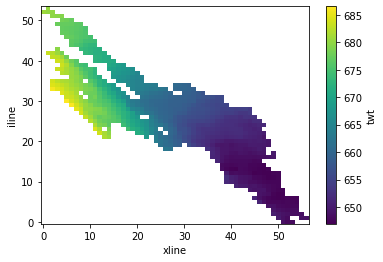

In [19]:
ds['twt'].plot()